# Parallel Gripper Data Visualization and Abnormality Detection

In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd
import seaborn as sns

In [2]:
# Read Data from file and create a DataFrame
df=pd.read_csv("pick_data.txt", delimiter=",", names=('x', 'y', 'z', 'd','s1','s2','s3'))

In [3]:
# Display the Data Frame df with heading and index
df.head()

,x,y,z,d,s1,s2,s3
0,-240.12,0,239.12,100.0,29.798,16.4250,7.9576
1,-240.12,0,239.02,100.0,27.322,27.0560,18.2510
2,-240.12,0,238.92,100.0,1.252,7.8986,11.9010
3,-240.12,0,238.82,100.0,21.369,7.9751,15.4260
4,-240.12,0,238.72,100.0,18.841,10.8900,2.5544


In [4]:
# Indexing the pickups
pick_measurments=int((df.index[-1]+1)/100)
pick_index=np.linspace(0,99,100)

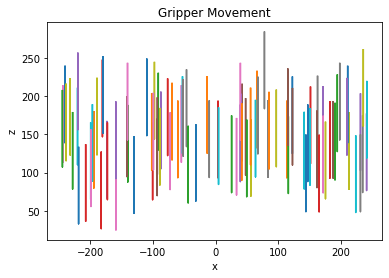

In [5]:
# As seen in the given data, y remains zero and for each x, the grippers moves in z direction in each pickup. 
for i in pick_index:
    plt.plot(df.loc[i*pick_measurments:i*pick_measurments+pick_measurments-1]['x'],df.loc[i*pick_measurments:i*pick_measurments+pick_measurments-1]['z'])


plt.xlabel('x')
plt.ylabel('z')
plt.title('Gripper Movement')
    
plt.show()

# Outlier Hypothesis
# Case 1: Impact -> Force S1
From below box plot some abnormalities in Force S1 is apparent, i.e. the data above the box that shows the Gaussian distribution of S1. To further investigate, the maximum force is plotted for each pickup and compared to determine number of outliers in the measurements. 

Impact is detected in 5 cases out of 100 picks. Impact indeicats the position of gripper (x) was not accurate and the gripper impacted the object when moving in z direction to pickup.


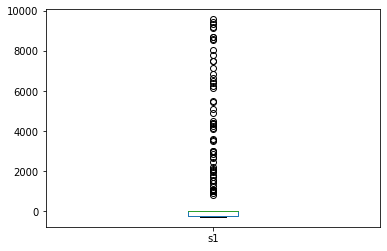

In [6]:
df['s1'].plot.box()

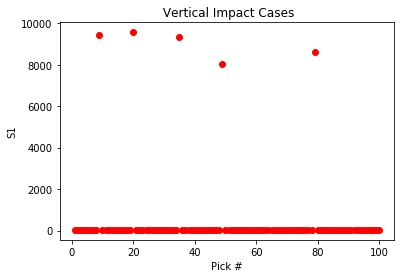

In [7]:

for i in pick_index:

    plt.plot(i+1,df.loc[i*pick_measurments:i*pick_measurments+pick_measurments-1]['s1'].max(),color="red", marker='o')
      
plt.xlabel('Pick #')
plt.ylabel('S1')
plt.title(' Vertical Impact Cases')

plt.show()


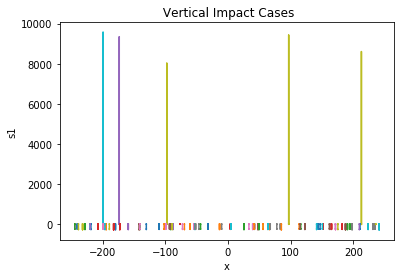

In [8]:
for i in pick_index:
    plt.plot(df.loc[i*pick_measurments:i*pick_measurments+pick_measurments-1]['x'],df.loc[i*pick_measurments:i*pick_measurments+pick_measurments-1]['s1'])
    
plt.xlabel('x')
plt.ylabel('s1')
plt.title(' Vertical Impact Cases')
    
plt.show()


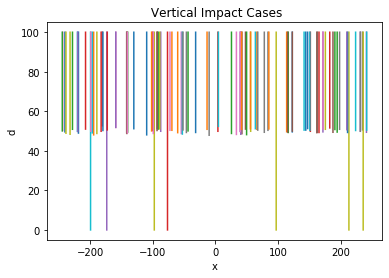

In [9]:
# The outliers shown in s1 graph are seen in d column as well. In few instances, the gripper distance is closed more 
# than 1/2 d. This is investigated in case 3 as well. 

for i in pick_index:
    plt.plot(df.loc[i*pick_measurments:i*pick_measurments+pick_measurments-1]['x'],df.loc[i*pick_measurments:i*pick_measurments+pick_measurments-1]['d'])


plt.xlabel('x')
plt.ylabel('d')
plt.title(' Vertical Impact Cases')
    
plt.show()

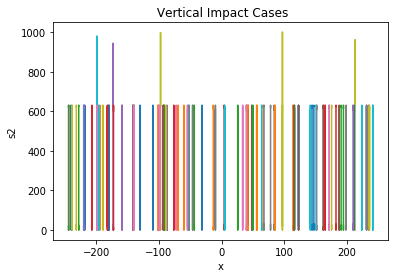

In [10]:
# some abnormalities are seen in both s2 and s3 forces and will be discussed in case 2. 

for i in pick_index:
    plt.plot(df.loc[i*pick_measurments:i*pick_measurments+pick_measurments-1]['x'],df.loc[i*pick_measurments:i*pick_measurments+pick_measurments-1]['s2'])

plt.xlabel('x')
plt.ylabel('s2')
plt.title(' Vertical Impact Cases')
    
plt.show()

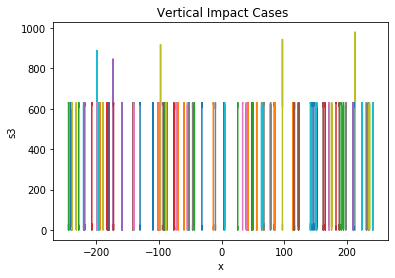

In [11]:
for i in pick_index:
    plt.plot(df.loc[i*pick_measurments:i*pick_measurments+pick_measurments-1]['x'],df.loc[i*pick_measurments:i*pick_measurments+pick_measurments-1]['s3'])
plt.xlabel('x')
plt.ylabel('s3')
plt.title(' Vertical Impact Cases')
    
plt.show()

# Case 2: Position error -> s2 and s3
From the box plot for difference between gripper tactile forces, s2 and s3, it is clear that in some pickup trials the forces deviate from isometric manner. The same conclusion can be derived form the normal distribution plot for s2-s3. Although most measurements show close to zero diffrence, there are soem outliers around +/- 300.
This can be explained by the deviation of pickup coordinate (x) from desired (actual location of target) and the gripper is not aiming for pickup at the correct coordinates, This icludes two cases: 

   # First:

The coordinate of gripper is slightly off, which leads to different level of tactile forces,for example one side is in contact with the object and one side is not. one tactile force is zero until the gripper pushes the object from the other side
    
   # Second:

The gripper is far from the desired location to pick up the object and when moving in z direction is not in contact with the target, in this case both forces are going to be zero and object is not picked up. This was not seen in the distributin plot. To further investigate this form of discrepencies in data, the average of the forces are plotted for each pickup. If the mean of force is zero it means that it never picked up the object. The vertical force also should be close to baseline zero as well as the other two forces s2 and s3. As seen below, none of the data points (relatd to each pickup) shows zero mean forces, and this case of error does not appear in the data set. 



Text(0.5, 0, 'S1-S2')

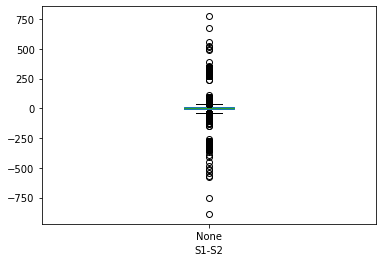

In [12]:
(df['s3']-df['s2']).plot.box()
plt.xlabel('S1-S2')


Text(0.5, 0, 'S1-S2')

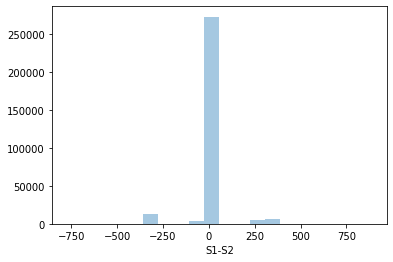

In [13]:
sns.distplot(df['s2']-df['s3'],kde=False,bins=20)
plt.xlabel('S1-S2')

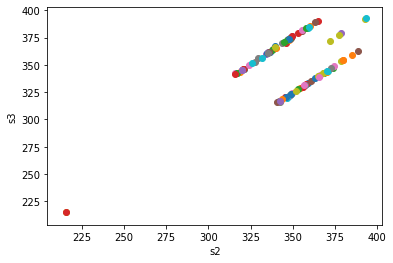

In [14]:
for i in pick_index:
    
    plt.scatter(df.loc[i*pick_measurments:i*pick_measurments+pick_measurments-1]['s2'].mean(),df.loc[i*pick_measurments:i*pick_measurments+pick_measurments-1]['s3'].mean())
    
plt.xlabel('s2')
plt.ylabel('s3')

plt.show()


# Case 3: Gripp error -> d

The distance between gripper fingers reduces from maximum 100 (completely open) to the object's size during pickup phase. Any vlaues between these two might be acceptable regardless of the distribution. However, if d appears zero in the measurements, it means that the gripper is completely closed. Providing the design allowes, this might be ok pre and post pickups, but obviously it is an anamoly when it is measured during holding or lifting the target. Some of these outliers are related to the impact case (case 1).



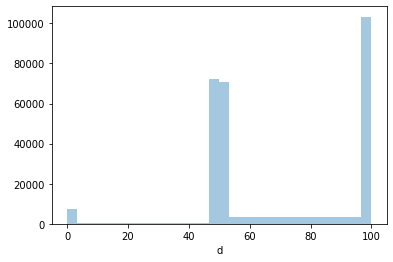

In [15]:
sns.distplot(df['d'],kde=False,bins=30)

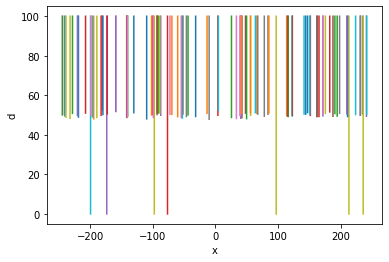

In [16]:
for i in pick_index:
   
    plt.plot(df.loc[i*pick_measurments:i*pick_measurments+pick_measurments-1]['x'],df.loc[i*pick_measurments:i*pick_measurments+pick_measurments-1]['d'])
    
plt.xlabel('x')
plt.ylabel('d')


plt.show()